# Oasis Infobyte : Data Science Internship


**Task 5:  Sales Prediction Using Python**


**Name of Intern:vivek popat shedge**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ps=pd.read_csv("C:/msc-II/advertising.csv")
ps

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
ps.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
ps.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
ps.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
ps.shape

(200, 4)

In [11]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


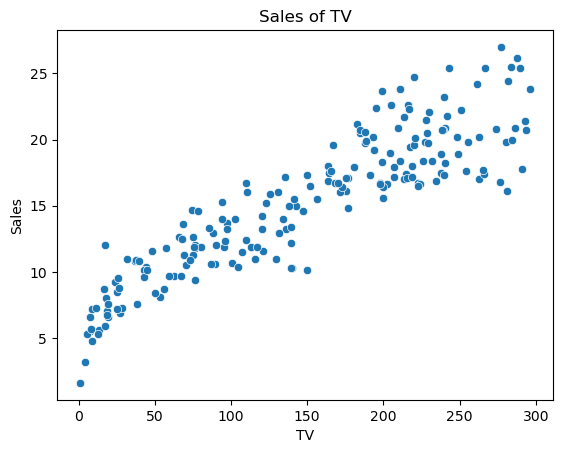

In [12]:
# DATA VISVUALIZATION
plt.title("Sales of TV")
sns.scatterplot(data=ps, x="TV",y="Sales")
plt.show()


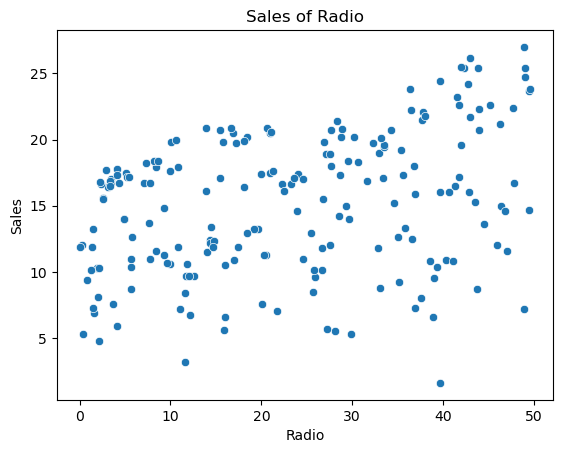

In [13]:
plt.title("Sales of Radio")
sns.scatterplot(data=ps, x="Radio",y="Sales")
plt.show()


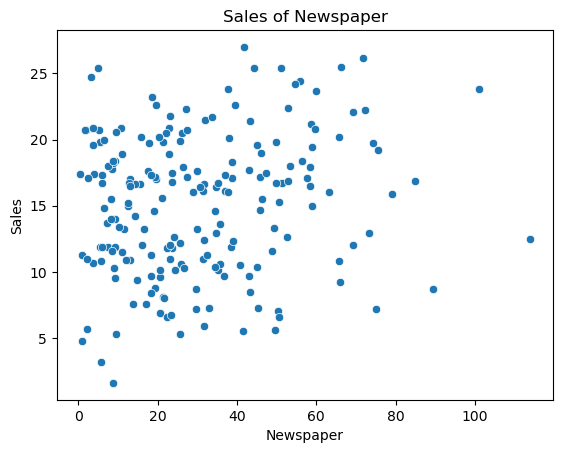

In [14]:
plt.title("Sales of Newspaper")
sns.scatterplot(data=ps, x="Newspaper",y="Sales")
plt.show()


In [15]:
ps.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

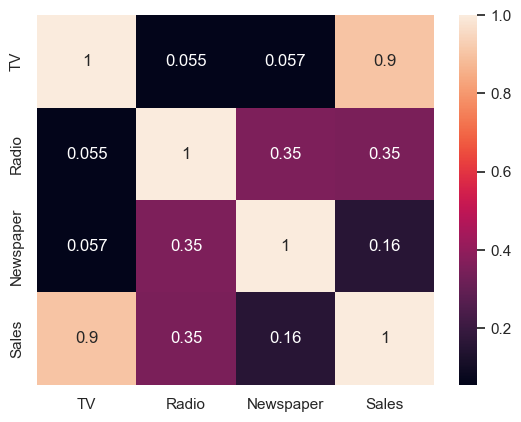

In [16]:
sns.set()
sns.heatmap(ps.corr(),annot=True)

In [17]:
# DATA SPLITTING
x = ps.drop('Sales',axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [18]:
y=ps['Sales']
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [19]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test , y_train , y_test= train_test_split(x,y,test_size=0.3,random_state=0)
lr.fit(x_train,y_train)
ypred =lr.predict(x_test) 
lr.score(x_train,y_train)

0.9159933497916115

In [21]:
ypred

array([10.68909303,  8.67371102,  9.59969914, 24.99989846, 14.73590568,
        8.37604918, 10.70350416, 18.37670708,  9.9670026 , 17.87946837,
       23.52765543, 10.70692059, 13.37566958, 17.10051561, 11.77005197,
       13.31194616, 21.13395461,  9.10945664, 14.24009701, 18.86885012,
       25.00670623, 12.42508633, 16.61899482, 13.84289673,  7.80458355,
       15.13012055, 14.69687153, 20.70140682, 16.9844145 ,  8.94984434,
       12.59168427, 20.93257626, 21.34337227, 21.89151357,  7.23908022,
        7.06001103,  9.28335812, 15.6840471 , 13.33894748,  7.28903633,
       11.05676585,  9.08768206, 15.60592891, 18.21716827, 18.9560652 ,
       13.47385617,  5.36520991, 10.59696871, 15.66036131, 10.98229096,
       12.20805533, 20.70970272, 20.70533061, 16.95931925,  9.96622132,
        9.44413497, 23.60505449, 15.99066008, 18.06706692,  8.25675464])

In [22]:
#Evaluation
print('MAE:\n',metrics.mean_absolute_error(ypred,y_test))
print('RMSE:\n', np.sqrt(metrics.mean_squared_error(ypred,y_test)))
print('R-Squared:\n',metrics.r2_score(ypred,y_test))

MAE:
 1.3662313868452756
RMSE:
 1.9844433024100954
R-Squared:
 0.8448538197964502
